In [11]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# reading datasets using pandas
sentiment = pd.read_csv("/content/fear_greed_index.csv")
trades = pd.read_csv("/content/historical_data.csv")

In [12]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [13]:
trades.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12


In [44]:
# analysing data types of the features as well as analysing the missing values per feature

print(sentiment.info())
print(75*('='))
print(trades.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   Date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18608 entries, 0 to 18607
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           18608 non-null  object        
 1   Coin              18608 non-null  object        
 2   Execution Price   18608 non-null  float64       
 3   Size Tokens       18608 non-null  float64       
 4   Size USD          18608 non-null  float64       
 5   Side              18608 non-null  object        
 6   Timestamp IST     18608 non-

In [15]:
# changing Timestamp IST datatype from float to datatime format
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')

# creating new feature 'Date'
trades['Date'] = trades['Timestamp IST'].dt.date

In [16]:
trades.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02


In [17]:
# changing datatype of 'data' to datetime
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# renaming 'date' to 'Date'
sentiment = sentiment.rename(columns={'date': 'Date'})

In [18]:
# calculating profit and loss per trader per day using groupby function.
daily_pnl = trades.groupby(
    ['Date', 'Account']
)['Closed PnL'].sum().reset_index()


In [19]:
# Calculating number of trades per person done per day using groupby function.
num_trades = trades.groupby(
    ['Date', 'Account']
).size().reset_index(name='num_trades')


In [20]:
# creating new feature 'win' which contian value profit or loss.
trades['win'] = trades['Closed PnL'] > 0

# Calculating rate of win per day per person using mean.
win_rate = trades.groupby(
    ['Date', 'Account']
)['win'].mean().reset_index(name='win_rate')


In [21]:
# Calculating average trade size per day per person using mean on 'Size USD'.
avg_trade_size = trades.groupby(
    ['Date', 'Account']
)['Size USD'].mean().reset_index(name='avg_trade_size')


In [22]:

leverage_proxy = trades.groupby(
    ['Account']
)['Size USD'].mean().reset_index(name='avg_size_usd')


In [23]:
# finding unique values of 'Direction'.
trades['Direction'].unique()

array(['Buy', 'Sell', 'Open Long', 'Close Long', 'Spot Dust Conversion',
       'Open Short', 'Close Short', 'Long > Short', 'Short > Long',
       'Auto-Deleveraging', 'Close'], dtype=object)

In [24]:
# Classifying unique values of feature 'Direction' into 'short', and 'long', and ignoring irrelevent ones.
def get_direction(x):
    if x in ['Buy','Open Long','Close Long','Long > Short']:
        return 'Long'
    elif x in ['Sell','Open Short','Close Short','Short > Long','Liquidated Isolated Short']:
        return 'Short'
    else:
        return 'Ignore'

trades['Direction'] = trades['Direction'].apply(get_direction)


In [25]:
# Calculating 'long_short_ratio' using long and short values of the direction.
long_short = trades.groupby(
    ['Date','Account','Direction']
).size().unstack(fill_value=0).reset_index()

long_short['long_short_ratio'] = (
    long_short.get('Long',0) /
    (long_short.get('Short',0) + 1)
)


In [26]:
# Merging all above created dataframes into one dataframe of traders
trader_daily = daily_pnl \
    .merge(num_trades, on=['Date','Account']) \
    .merge(win_rate, on=['Date','Account']) \
    .merge(avg_trade_size, on=['Date','Account']) \
    .merge(long_short[['Date','Account','long_short_ratio']],
           on=['Date','Account'])
trader_daily.head()


,Date,Account,Closed PnL,num_trades,win_rate,avg_trade_size,long_short_ratio
0,2024-04-20,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,20,0.0,2436.682500,20.0
1,2024-04-25,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,68,0.0,753.851029,68.0
2,2024-06-19,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,3,0.0,7722.796667,3.0
3,2024-06-20,0x430f09841d65beb3f27765503d0f850b8bce7713,57478.456026,8,1.0,21188.468750,0.0
4,2024-07-23,0x430f09841d65beb3f27765503d0f850b8bce7713,88084.992348,229,1.0,1072.259563,229.0


In [27]:
# merging traders dataframe into sentiment dataframe.
final_df = trader_daily.merge(
    sentiment,
    on='Date',
    how='left'
)
final_df.head()

,Date,Account,Closed PnL,num_trades,win_rate,avg_trade_size,long_short_ratio,timestamp,value,classification
0,2024-04-20,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,20,0.0,2436.682500,20.0,1.713591e+09,66.0,Greed
1,2024-04-25,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,68,0.0,753.851029,68.0,1.714023e+09,72.0,Greed
2,2024-06-19,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,3,0.0,7722.796667,3.0,1.718775e+09,64.0,Greed
3,2024-06-20,0x430f09841d65beb3f27765503d0f850b8bce7713,57478.456026,8,1.0,21188.468750,0.0,1.718861e+09,60.0,Greed
4,2024-07-23,0x430f09841d65beb3f27765503d0f850b8bce7713,88084.992348,229,1.0,1072.259563,229.0,1.721713e+09,71.0,Greed


# Part B — Analysis (must-have)

**1) Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?**

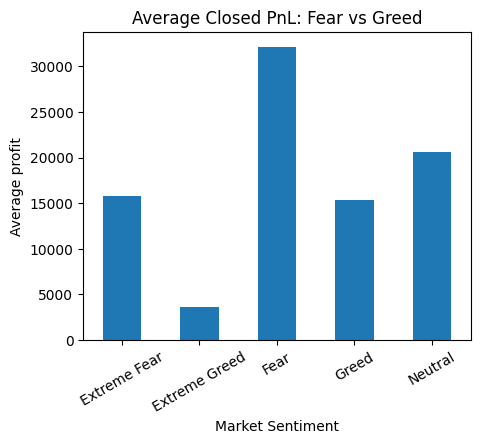

In [28]:
# analysing whether the performance of closed PnL differ btw fear and greed.
plt.figure(figsize=(5,4))
final_df.groupby('classification')['Closed PnL'].mean().plot(kind='bar')
plt.title('Average Closed PnL: Fear vs Greed')
plt.ylabel('Average profit')
plt.xlabel('Market Sentiment')
plt.xticks(rotation = 30)
plt.show()


visible that during greed profit is very few while during fear, chances of profit are comparatively high. this shows that trader remains causious during fear and make controlled profits.

<Axes: title={'center': 'Closed PnL'}, xlabel='classification'>

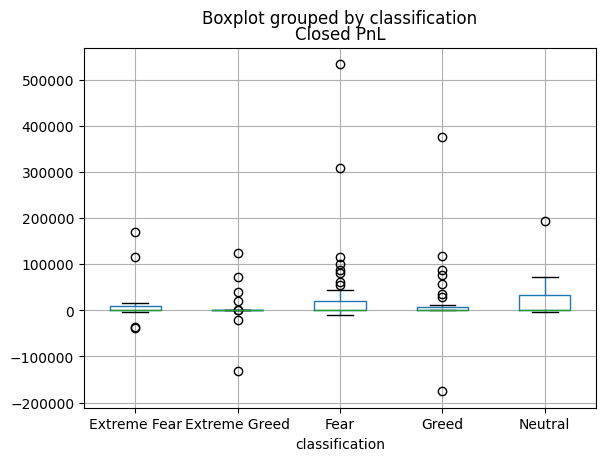

In [29]:

final_df.boxplot(column='Closed PnL', by='classification')

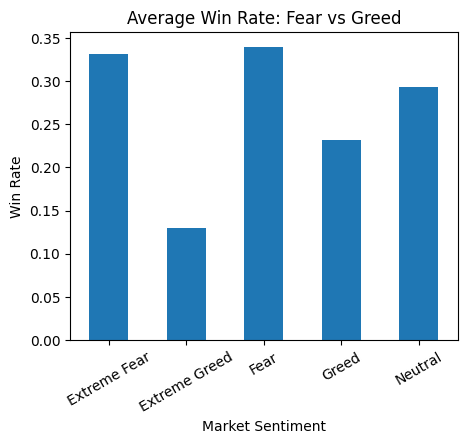

In [30]:
# analysing whether the performance of 'win_rate' differ btw fear and greed.
plt.figure(figsize=(5,4))
final_df.groupby('classification')['win_rate'].mean().plot(kind='bar')
plt.title('Average Win Rate: Fear vs Greed')
plt.ylabel('Win Rate')
plt.xlabel('Market Sentiment')
plt.xticks(rotation = 30)
plt.show()


In [31]:
# creating a new feature of loss or profit per day.
final_df['loss_day'] = final_df['Closed PnL'] < 0
final_df.head()

,Date,Account,Closed PnL,num_trades,win_rate,avg_trade_size,long_short_ratio,timestamp,value,classification,loss_day
0,2024-04-20,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,20,0.0,2436.682500,20.0,1.713591e+09,66.0,Greed,False
1,2024-04-25,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,68,0.0,753.851029,68.0,1.714023e+09,72.0,Greed,False
2,2024-06-19,0x430f09841d65beb3f27765503d0f850b8bce7713,0.000000,3,0.0,7722.796667,3.0,1.718775e+09,64.0,Greed,False
3,2024-06-20,0x430f09841d65beb3f27765503d0f850b8bce7713,57478.456026,8,1.0,21188.468750,0.0,1.718861e+09,60.0,Greed,False
4,2024-07-23,0x430f09841d65beb3f27765503d0f850b8bce7713,88084.992348,229,1.0,1072.259563,229.0,1.721713e+09,71.0,Greed,False


Text(0.5, 0, 'Market Sentiment')

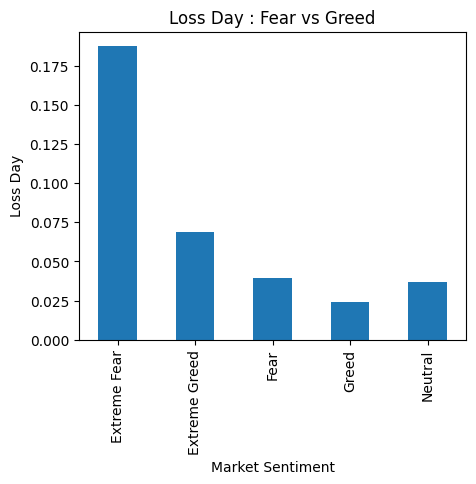

In [32]:
# analysing whether the performance of 'loss_day' differ btw fear and greed.
plt.figure(figsize = (5,4))
final_df.groupby('classification')['loss_day'].mean().plot(kind = 'bar')
plt.title('Loss Day : Fear vs Greed')
plt.ylabel('Loss Day')
plt.xlabel('Market Sentiment')

It shows that loss occurs when there is fear in the market and sell of is very high.

**2) Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?**

In [33]:
# Analysing ave number of trades changes during fear and greed.
final_df.groupby('classification')['num_trades'].mean()


,num_trades
classification,
Extreme Fear,46.687500
Extreme Greed,55.172414
Fear,164.980392
Greed,112.666667
Neutral,115.148148


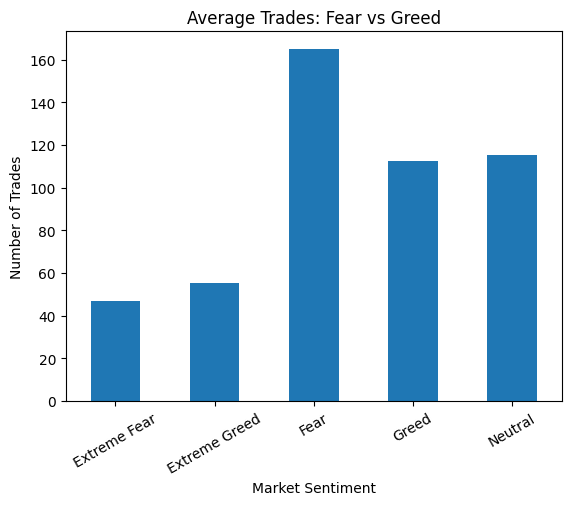

In [34]:
final_df.groupby('classification')['num_trades'].mean().plot(kind='bar')
plt.title('Average Trades: Fear vs Greed')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.xticks(rotation = 30)
plt.show()


It shows that during fear mass selling take place and due to this number of trades become very high in comparision of the trade during the sentiment of greed and neutral.

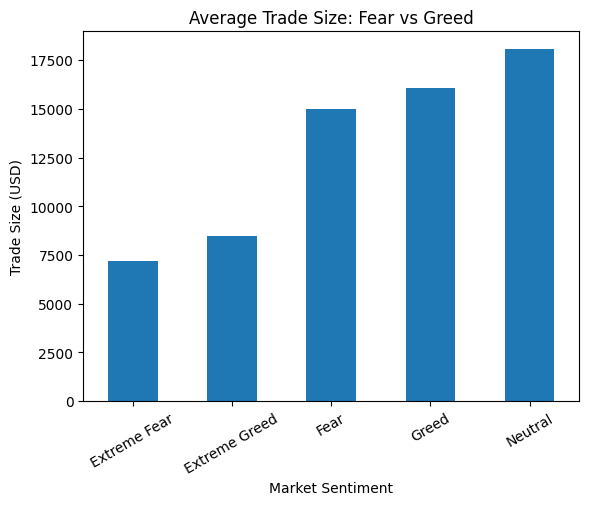

In [35]:
# Visualising changes of average trade size during fear and greed period.
final_df.groupby('classification')['avg_trade_size'].mean().plot(kind='bar')
plt.title('Average Trade Size: Fear vs Greed')
plt.ylabel('Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation = 30)
plt.show()


It shows that the highest money is infused in the market when market sentiments are neutral while, it is infused very low when sentiment is fearful.

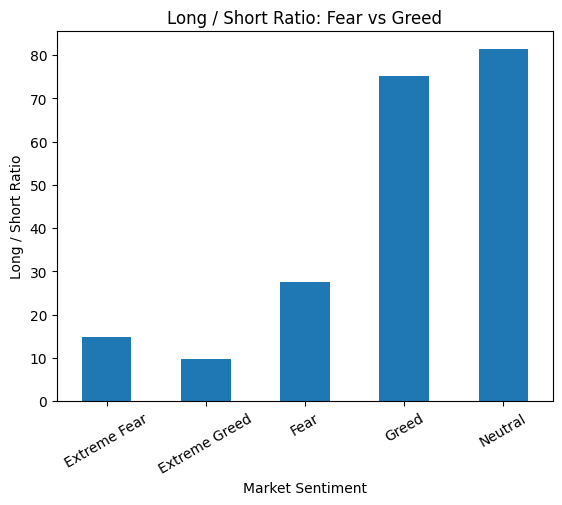

In [36]:
# visualising bullish and bear during greed and fear period.
final_df.groupby('classification')['long_short_ratio'].mean().plot(kind='bar')
plt.title('Long / Short Ratio: Fear vs Greed')
plt.ylabel('Long / Short Ratio')
plt.xlabel('Market Sentiment')
plt.xticks(rotation = 30)
plt.show()


It shows that people are the highest bullish when market is neutral. their bullishness falls as market sentiment changes towards extreme greed. It indicates that during greedy period trader is not so much bullish as he know that market is going to reset soon

**3) Identify 2–3 segments (examples):**

High leverage vs low leverage traders

In [37]:
# calculating leverage using 'Size USD' and 'Start Position'
final_df['leverage'] = trades['Size USD'] / trades['Start Position']

# calculating ave of leverage per trader.
lev_trader = (final_df.groupby('Account')['leverage'].mean().reset_index())

In [38]:
# calculating whether leverage is low or high.
median_lev = final_df['leverage'].median()

final_df['leverage_segment'] = final_df['leverage'].apply(
    lambda x: 'High Leverage' if x > median_lev else 'Low Leverage'
)

#final_df['leverage_segment'].value_counts()
final_df.groupby('classification')['leverage_segment'].value_counts()

classification  leverage_segment
Extreme Fear    Low Leverage         9
                High Leverage        7
Extreme Greed   Low Leverage        21
                High Leverage        8
Fear            High Leverage       34
                Low Leverage        17
Greed           High Leverage       22
                Low Leverage        20
Neutral         Low Leverage        16
                High Leverage       11
Name: count, dtype: int64

frequent vs infrequent traders


In [39]:
# Calculating number of trades a trader do
trade_count = (final_df.groupby('Account').size()).reset_index(name='no_of_trade')


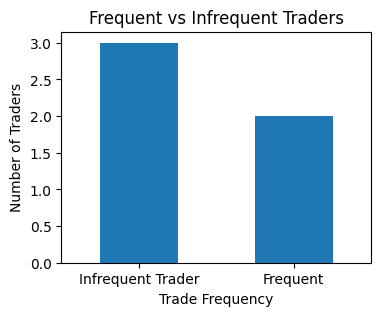

In [40]:
# classifying whether trader is frequent or infrequent using the median of no_of_trade.
median_trade = trade_count['no_of_trade'].median()
trade_count['trade_frequency'] = trade_count['no_of_trade'].apply(
    lambda x: 'Frequent' if x > median_trade else 'Infrequent Trader')
plt.figure(figsize=(4,3))
trade_count['trade_frequency'].value_counts().plot(kind='bar')
plt.title('Frequent vs Infrequent Traders')
plt.ylabel('Number of Traders')
plt.xlabel('Trade Frequency')
plt.xticks(rotation=0)
plt.show()

Consistent winners vs inconsistent traders

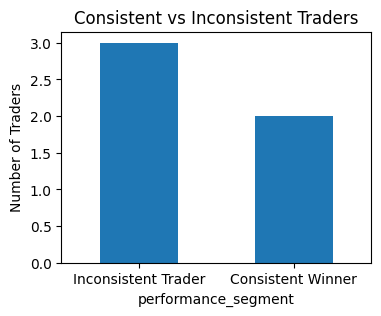

In [41]:
# Classifying consistent winner and inconsistent traders.
daily_pnl = (final_df.groupby(['Account', 'Date'])['Closed PnL'].sum().reset_index())
daily_pnl['win'] = daily_pnl['Closed PnL'] > 0
win_rate = (daily_pnl.groupby('Account')['win'].mean().reset_index(name='win_rate'))
win_rate['performance_segment'] = win_rate['win_rate'].apply(
    lambda x: 'Consistent Winner' if x >= 0.55 else 'Inconsistent Trader')

plt.figure(figsize=(4,3))
win_rate['performance_segment'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Consistent vs Inconsistent Traders')
plt.ylabel('Number of Traders')
plt.show()




**4) Provide at least 3 insights backed by charts/tables**

1) During greed, profit is very low while during fear, the chances of profit are comparatively high. this shows that trader remains causious during fear and make controlled profits.
2) Loss occurs when there is fear in the market and sell off is very high.During fear mass selling take place and due to this number of trades become very high in comparision of the trade during the sentiment of greed and neutral.

3) The highest money is infused in the market when market sentiments are neutral while, its infused is very low when sentiments are fearful. Thus people are the highest bullish when market is neutral but, their bullishness falls as market sentiment changes towards extreme greed. It indicates that people know while investing during greedy period that market is going to reset soon.

# **Part C — “Actionable output” (must-have)**

1) We should try to invest when market sentiment is fearful because after sometime market will have completed correction and restart gaining again which will provide us the great profit.

2) One should avoid sell off during fearfull sentiment of the market as sentiment occurs due to mass sell off by new comers and, ultimately market will regain and our money will be safe again. Thus we should try to invest money for longer period not for the small period.